In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use('fivethirtyeight')
#sns.set_style("darkgrid")

In [2]:
# read data
train = pd.read_csv("train_qWM28Yl.csv") 
test = pd.read_csv("test_zo1G9sv.csv")
print(train.shape)
print(test.shape)
train.head()

(58592, 44)
(39063, 43)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


The *test* dataset doesn't have the column **is_claim**. I will be predicting whethere a claim will be filed (target = 1) or not (target = 0).

In [3]:
feature_bin = [f for f in train.columns if (f.startswith('is_')) & (f not in ['is_claim'])] 
feature_bin

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [4]:
train.replace(('Yes', 'No'), (1, 0), inplace=True)
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,0,1,1,1,0,1,1,1,2,0


In [5]:
test.replace(('Yes', 'No'), (1, 0), inplace=True)
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,0,0,0,0,1,0,0,0,1,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,0,1,1,1,1,1,1,1,1,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,0,0,1,1,1,0,1,1,1,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,0,0,0,0,1,0,0,0,1,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,0,0,0,0,1,0,0,0,1,0


### About Missing Data
From data description, values of **-1** indicate that the feature was missing from the observation. Let's check missing data.

### Drop Redundant Features & Replace Missing Data
* Features **'ps_car_03_cat'** and **'ps_car_05_cat'** have more than 40% data missing, drop them.
* Analyze the correlations of all remaining features, drop redundant features
* Replace missing data in remaining features

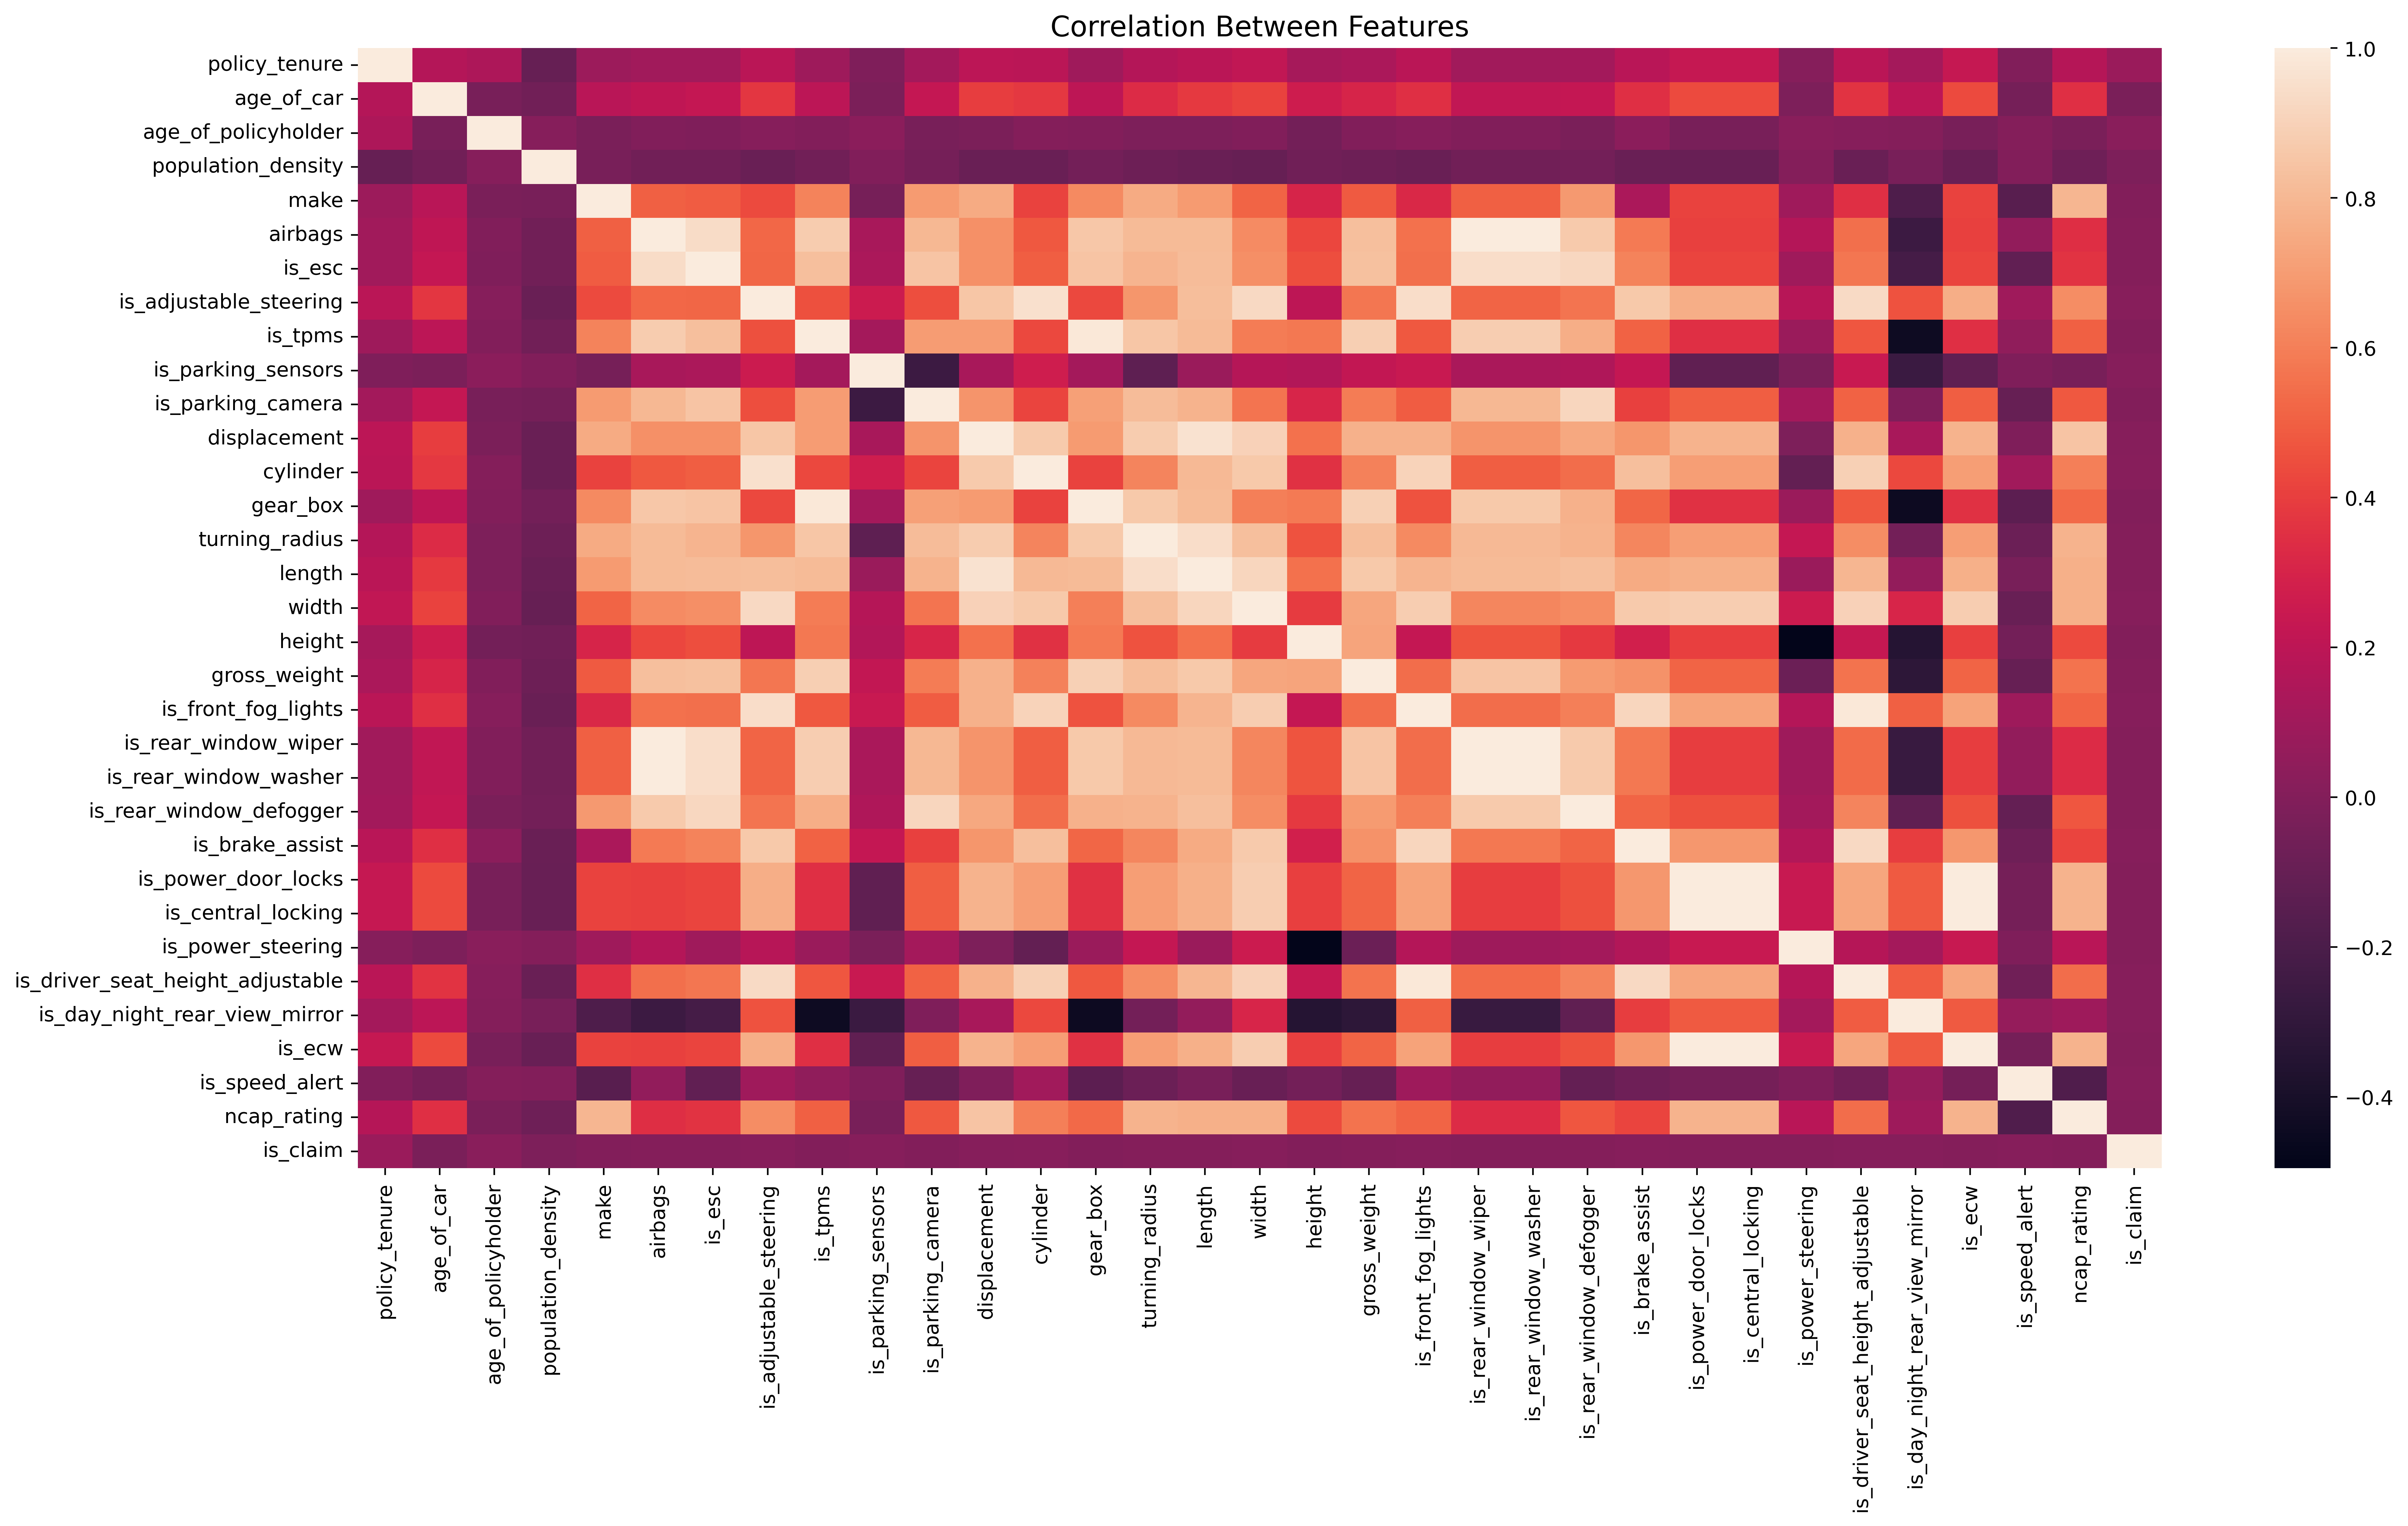

In [6]:
# visualize the correlation between remaining features
corr = train.corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.jpg')
plt.show()

Now replace the missing data in the remaining features:
* For binary features (bin) and categorical features (cat), replace missing data with the most frequest value of the feature
* For other features (continuous or ordinal), replace missing data with mean value of the feature

In [7]:
temp = [i for i in (train.select_dtypes(include=['object']).columns) if i not in ['policy_id']]
temp
#train.dtypes

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'rear_brakes_type',
 'transmission_type',
 'steering_type']

In [8]:
# segregating features by category types
feature_bin = [f for f in train.columns if (f.startswith('is_')) & (f not in ['is_claim'])]
feature_cat = [i for i in (train.select_dtypes(include=['object']).columns) if i not in ['policy_id']]
feature_els = [f for f in train.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['policy_id', 'is_claim'])]

In [9]:
feature_els

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating']

Now let's look at these features' data distribution:

### Data Preparation
Before applying machine learning algorithms, I should conduct feature standardization (z-score normalization).

In [10]:
# standardization of non categorical features
feature_non_cat = [f for f in train.columns if (f not in feature_cat) & (f not in ['policy_id', 'is_claim'])]
scaler = StandardScaler()

X_train = train.drop(['policy_id', 'is_claim'], axis=1)
y_train = train['is_claim']
X_valid = test.drop('policy_id', axis=1)

X_train.loc[:, feature_non_cat] = scaler.fit_transform(X_train[feature_non_cat])
X_valid.loc[:, feature_non_cat] = scaler.transform(X_valid[feature_non_cat])

In [11]:
# covert categorical features to dummy variables
train_num = train.shape[0]

dataset = pd.concat([X_train, X_valid], axis=0)   
dataset = pd.get_dummies(columns=feature_cat, data=dataset)

X_train = dataset[:train_num]
X_valid = dataset[train_num:]
print(X_train.shape)
print(X_valid.shape)

(58592, 110)
(39063, 110)


### Feature Selection (Random Forest Classifier)

In [12]:
# split training dataset to random training and testing dataset for validation later
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size = 0.7)

In [13]:
# train the model with 50 trees, 4 parallel processes, and 10 minimum samples to split a node 
num_trees = 50
rf = RandomForestClassifier(n_estimators=num_trees, n_jobs=4, min_samples_split=10, verbose=2, oob_score = True)
rf.fit(X=X_train, y=y_train)

building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50building tree 24 of 50

building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50building tree 36 of 50

building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomForestClassifier(min_samples_split=10, n_estimators=50, n_jobs=4,
                       oob_score=True, verbose=2)

In [14]:
# generate predictions on test datasets (which is a random subset split from the training set)
rf_predictions = rf.predict_proba(X_test)[:, 1]

# get AUC score (produce probabilistic predictions)
print(roc_auc_score(y_test, rf_predictions))

# get accuracy score (predict the class)
rf_predictions_class = rf.predict(X_test)
print(accuracy_score(y_test, rf_predictions_class, normalize=True))

0.5888140762992412
0.9363977699396974


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


In [15]:
# select 20 most important features 
# print out and store the 20 features' names and their importances to a dataframe 'df_feature_select20'
feature_names = list(X_test.columns.values)
feature_importances = list(rf.feature_importances_)
feature_list = []

for i in range(0,len(feature_names)):
    feature_list.append((feature_names[i], feature_importances[i]))
    
df_feature_select20 = pd.DataFrame(sorted(feature_list, reverse=True, key=lambda x: x[1])[:20])
df_feature_select20.columns = ['feature_select', 'feature_importance']
print(df_feature_select20)

         feature_select  feature_importance
0         policy_tenure            0.433078
1   age_of_policyholder            0.281153
2            age_of_car            0.169368
3    population_density            0.025782
4       area_cluster_C8            0.005636
5       area_cluster_C2            0.005175
6      area_cluster_C14            0.004692
7       area_cluster_C3            0.004513
8       area_cluster_C5            0.004383
9      area_cluster_C13            0.004246
10      area_cluster_C9            0.003995
11      area_cluster_C4            0.003788
12     area_cluster_C11            0.003518
13      area_cluster_C7            0.003418
14     area_cluster_C19            0.003398
15      area_cluster_C6            0.003108
16     area_cluster_C12            0.002863
17      area_cluster_C1            0.002709
18     area_cluster_C18            0.002689
19     area_cluster_C21            0.002455


In [16]:
# slice datasets to contain information on only these 20 features
X_train_select20 = X_train[df_feature_select20['feature_select']]
X_valid_select20 = X_valid[df_feature_select20['feature_select']]
X_test_select20 = X_test[df_feature_select20['feature_select']]

### Train A Model (Logistic Regression)
Let's train a model learning from data on data of these selected featues. Here I only used logistic regression model, many more other algorithms can be implemented.

In [17]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# calculate regression score to test over fitting
print(lr.score(X_train, y_train) , lr.score(X_test, y_test))

0.9358755546886429 0.9363977699396974


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predict & Output
Apply the logistic regression model on original test dataset, write the prediction of risks (**_target_** value) to a .csv file.

In [18]:
test.policy_id

0        ID58593
1        ID58594
2        ID58595
3        ID58596
4        ID58597
          ...   
39058    ID97651
39059    ID97652
39060    ID97653
39061    ID97654
39062    ID97655
Name: policy_id, Length: 39063, dtype: object

In [19]:
# apply the model on test dataset for prediction
id = test.policy_id
result = lr.predict_proba(X_valid)

output = pd.DataFrame( { 'policy_id': id , 'is_claim': result[:,1]} )
output = output[['policy_id', 'is_claim']]

output.to_csv("submission_50trees-logic.csv", index = False)
output.head(10)

,policy_id,is_claim
0,ID58593,0.072518
1,ID58594,0.042090
2,ID58595,0.034577
3,ID58596,0.075968
4,ID58597,0.108730
5,ID58598,0.035295
6,ID58599,0.081427
7,ID58600,0.116576
8,ID58601,0.034350
9,ID58602,0.091047


### Submit to Kaggle Competition
Current normalized Gini score: 0.241